In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

In [3]:
df = np.genfromtxt('D:/Github/eeg.fem/public/data/Musical/5956733/data_for_train/ALL_3C_128.csv',delimiter=',')
x = df[:, :-1]
y = df[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.3)

In [3]:
%%time
classifier = SVC(kernel='rbf', max_iter=-1 ,decision_function_shape='ovr')
params = {'C': [1e-5, 1, 1e5],
          'gamma': [1e-5, 1, 1e5, 'scale'],
          'tol': [1e-3]}
rs = RandomizedSearchCV(classifier, params, cv=8, scoring='accuracy', n_iter=12)
rs.fit(X_train, y_train)
print(pd.DataFrame(rs.cv_results_)[['param_C','param_gamma','mean_test_score']])

   param_C param_gamma  mean_test_score
0    1e-05       1e-05         0.373902
1    1e-05           1         0.373902
2    1e-05      100000         0.373902
3    1e-05       scale         0.373902
4        1       1e-05         0.533172
5        1           1         0.373902
6        1      100000         0.373902
7        1       scale         0.525703
8   100000       1e-05         0.584139
9   100000           1         0.373902
10  100000      100000         0.373902
11  100000       scale         0.585896
Wall time: 4h 22min 47s


In [4]:
%%time
classifier = SVC(kernel='rbf', max_iter=-1 ,decision_function_shape='ovr')
params = {'C': [1, 1e5],
          'gamma': [1e-8, 'scale'],
          'tol': [1e-3]}
rs = RandomizedSearchCV(classifier, params, cv=8, scoring='accuracy', n_iter=4)
rs.fit(X_train, y_train)
print(pd.DataFrame(rs.cv_results_)[['param_C','param_gamma','mean_test_score']])

  param_C param_gamma  mean_test_score
0       1       1e-08         0.373902
1       1       scale         0.525703
2  100000       1e-08         0.968805
3  100000       scale         0.585896
Wall time: 1h 51min 55s


In [3]:
%%time
classifier = SVC(kernel='rbf', max_iter=-1 ,decision_function_shape='ovr')
params = {'C': [1, 1e5, 1e7],
          'gamma': [1e-9, 1e-8, 'scale'],
          'tol': [1e-3]}
rs = RandomizedSearchCV(classifier, params, cv=8, scoring='accuracy', n_iter=9)
rs.fit(X_train, y_train)
print(pd.DataFrame(rs.cv_results_)[['param_C','param_gamma','mean_test_score']])

  param_C param_gamma  mean_test_score
0       1       1e-09         0.373902
1       1       1e-08         0.373902
2       1       scale         0.525703
3  100000       1e-09         0.402900
4  100000       1e-08         0.968805
5  100000       scale         0.585896
6   1e+07       1e-09         0.762302
7   1e+07       1e-08         0.997803
8   1e+07       scale         0.585896
Wall time: 6h 7min 52s


In [4]:
%%time
classifier = SVC(kernel='rbf', max_iter=-1 ,decision_function_shape='ovr')
params = {'C': [1e5],
          'gamma': [1e-9, 1e-8, 1e-7],
          'tol': [1e-3]}
rs = RandomizedSearchCV(classifier, params, cv=8, scoring='accuracy', n_iter=3)
rs.fit(X_train, y_train)
print(pd.DataFrame(rs.cv_results_)[['param_C','param_gamma','mean_test_score']])

  param_C param_gamma  mean_test_score
0  100000       1e-09         0.402900
1  100000       1e-08         0.968805
2  100000       1e-07         0.820958
Wall time: 1h 32min 29s


In [3]:
%%time
import joblib
from sklearn.metrics import classification_report
#Dividimos el test set en test y val
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=3, test_size=2/3)
classifier = SVC(kernel='rbf', gamma=1e-8, max_iter=-1, C=1e5, tol=1e-3, decision_function_shape='ovr')
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print('TEST SET:')
print(classification_report(y_test, y_predict))
print('VAL SET:')
y_val_predict = classifier.predict(X_val)
print(classification_report(y_val, y_val_predict))
joblib.dump(classifier, 'D:/Github/eeg.fem/public/data/Musical/5956733/ML_models/Model_RBF_128')

TEST SET:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       515
         2.0       0.98      0.99      0.99       464
         3.0       0.99      0.97      0.98       323

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302

VAL SET:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       239
         2.0       0.96      1.00      0.98       234
         3.0       0.99      0.94      0.97       177

    accuracy                           0.98       650
   macro avg       0.98      0.98      0.98       650
weighted avg       0.98      0.98      0.98       650

Wall time: 6min 18s


In [4]:
%%time
classifier = SVC(kernel='rbf', max_iter=-1 ,decision_function_shape='ovr')
params = {'C': [1e5],
          'gamma': [1e-7, 5e-7, 1e-8],
          'tol': [1e-3]}
rs = RandomizedSearchCV(classifier, params, cv=8, scoring='accuracy', n_iter=3)
rs.fit(X_train, y_train)
print(pd.DataFrame(rs.cv_results_)[['param_C','param_gamma','mean_test_score']])

  param_C param_gamma  mean_test_score
0  100000       1e-07         0.820958
1  100000       5e-07         0.643234
2  100000       1e-08         0.968805
Wall time: 1h 48min 11s


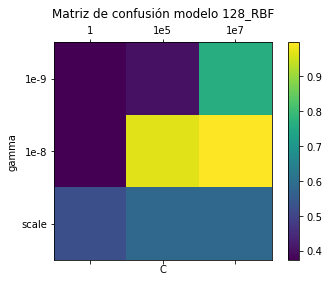

In [18]:
import matplotlib.pyplot as plt

c_param = ['1', '1e5', '1e7']
gamma_param = ['1e-9', '1e-8', 'scale']
 
""" test_score = np.array(([0.373902, 0.373902, 0.525703],[0.402900, 0.968805, 0.585896],[0.762302, 0.997803, 0.585896])) """

test_score = np.array(([0.373902, 0.402900, 0.762302],[0.373902, 0.968805, 0.997803],[0.525703, 0.585896, 0.585896]))

figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(test_score, interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels(['']+c_param)
axes.set_yticklabels(['']+gamma_param)
axes.set_title('Matriz de confusión modelo 128_RBF', pad=15)
axes.set_xlabel('C')
axes.set_ylabel('gamma')
plt.show()